In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kernel trick by adding a dimension

Taking 1 dimensional data (X1) and using a function to map the data into 2 dimensional space (X2)

In the first graph you can see the data is not seperable by a single line

After transformation, you can separate the two classes, as seen in the 2nd graph

In [15]:
X1 = np.array((1,2,3,4,5,6,7,8,9,10))
y1 = np.array((0,0,0,1,1,1,1,0,0,0))
X1 # one dimensional data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

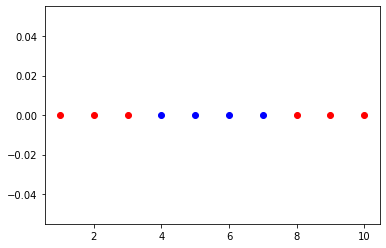

In [16]:
plt.scatter([x for (x,y) in zip(X1,y1) if y == 0],[0 for (x,y) in zip(X1,y1) if y == 0],color='red')
plt.scatter([x for (x,y) in zip(X1,y1) if y == 1],[0 for (x,y) in zip(X1,y1) if y == 1],color='blue')
plt.show();

In [20]:
# Standardise the data centering around 0
X1_mean = sum(X1)/len(X1)
X1_std = np.sqrt(sum([(x-X1_mean)**2 for x in X1])/(len(X1)-1))
X1 = [(x-X1_mean)/X1_std for x in X1]
# Create 2nd dimension
X2 = np.array([x**2 for x in X1])
X2

array([2.20909091, 1.33636364, 0.68181818, 0.24545455, 0.02727273,
       0.02727273, 0.24545455, 0.68181818, 1.33636364, 2.20909091])

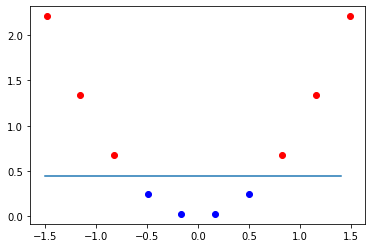

In [25]:
plt.scatter([x for (x,y) in zip(X1,y1) if y == 0],[x for (x,y) in zip(X2,y1) if y == 0],color='red')
plt.scatter([x for (x,y) in zip(X1,y1) if y == 1],[x for (x,y) in zip(X2,y1) if y == 1],color='blue')
plt.plot([x/10 for x in range(-15,15)],[0.45for x in range(-15,15)])
plt.show();

# Kernel trick into the same dimension (linear)

Starts with plotting two dimensional data (X1, X2)

Then we apply a linear mapping to create a kernel matrix.

The data is then re-plotted

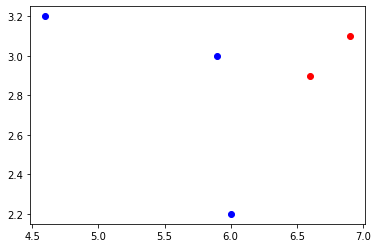

In [57]:
X1 = [5.9,6.9,6.6,4.6,6]
X2 = [3,3.1,2.9,3.2,2.2]
y = [1,0,0,1,1]

plt.scatter([x for (x,y) in zip(X1,y)if y == 1],[x for (x,y) in zip(X2,y)if y == 1],color='blue')
plt.scatter([x for (x,y) in zip(X1,y)if y == 0],[x for (x,y) in zip(X2,y)if y == 0],color='red')
plt.show();

In [49]:
K_matrix = np.zeros((len(X1),len(X1)))
for i in range(0,len(X1)):
    for k in range(0,len(X1)):
        K_matrix[i,k] = X1[i]*X1[k]+X2[i]*X2[k]
K_matrix

array([[43.81, 50.01, 47.64, 36.74, 42.  ],
       [50.01, 57.22, 54.53, 41.66, 48.22],
       [47.64, 54.53, 51.97, 39.64, 45.98],
       [36.74, 41.66, 39.64, 31.4 , 34.64],
       [42.  , 48.22, 45.98, 34.64, 40.84]])

In [46]:
diag = [K_matrix[x,x] for x in range(0,len(X1))]
diag

[43.81, 57.220000000000006, 51.97, 31.4, 40.84]

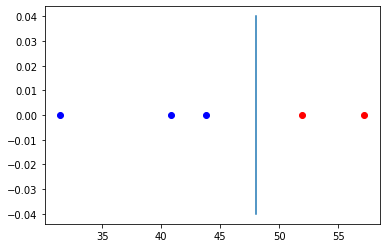

In [55]:
plt.scatter([x for (x,y) in zip(diag,y) if y == 1],[0 for (x,y) in zip(diag,y) if y == 1],color='blue')
plt.scatter([x for (x,y) in zip(diag,y) if y == 0],[0 for (x,y) in zip(diag,y) if y == 0],color='red')
plt.plot([48 for x in diag],[x/100 for x in range(-4,6,2)])
plt.show();

# Quadratic kernel

In [67]:
quad_matrix = np.array([[x**2,y**2,np.sqrt(2)*x*y]for (x,y) in zip(X1,X2)])
quad_matrix

array([[34.81      ,  9.        , 25.03158005],
       [47.61      ,  9.61      , 30.2500281 ],
       [43.56      ,  8.41      , 27.06804758],
       [21.16      , 10.24      , 20.81722364],
       [36.        ,  4.84      , 18.66761902]])

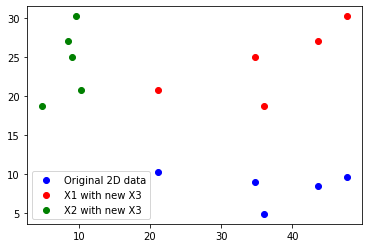

In [74]:
plt.scatter(quad_matrix[:,0],quad_matrix[:,1],label='Original 2D data',color='blue')
plt.scatter(quad_matrix[:,0],quad_matrix[:,2],label='X1 with new X3',color='red')
plt.scatter(quad_matrix[:,1],quad_matrix[:,2],label='X2 with new X3',color='green')
plt.legend()
plt.show();

# Mercer kernel

1. Input a matrix D of size n x m

2. Compute a Kernel matrix K of n x n (linear inner products matrix)

3. If K is positive and semi-definite, apply eigenvalue decomposition

4. The number of non-zero e-values is the dimensionality

5. To apply the new dimensionality, we use Mercer's function phi(M)

6. Verify that in the Mercer space, inner products can be mapped back to look-ups in the K matrix (point 2)

In [75]:
print(X1)
print(X2)

[5.9, 6.9, 6.6, 4.6, 6]
[3, 3.1, 2.9, 3.2, 2.2]


In [76]:
K_matrix = np.zeros((len(X1),len(X1)))
for i in range(0,len(X1)):
    for k in range(0,len(X1)):
        K_matrix[i,k] = X1[i]*X1[k]+X2[i]*X2[k]
K_matrix

array([[43.81, 50.01, 47.64, 36.74, 42.  ],
       [50.01, 57.22, 54.53, 41.66, 48.22],
       [47.64, 54.53, 51.97, 39.64, 45.98],
       [36.74, 41.66, 39.64, 31.4 , 34.64],
       [42.  , 48.22, 45.98, 34.64, 40.84]])

In [77]:
K_matrix >0

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [241]:
eig_pairs = np.linalg.eig(K_matrix)
ev_vector = eig_pairs[0][:2] # apparently the first 2 are non-zero and others are zero according to alessandro
ev_d_matrix = np.zeros((2,2))
for i in range(0,len(ev_vector)):
    ev_d_matrix[i,i] = ev_vector[i]
U = eig_pairs[1][:,:2]
new_K = np.linalg.multi_dot([U,ev_d_matrix,np.transpose(U)])
new_K 

<ipython-input-241-391eb1566b8c>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ev_d_matrix[i,i] = ev_vector[i]


array([[43.81+0.j, 50.01+0.j, 47.64+0.j, 36.74+0.j, 42.  +0.j],
       [50.01+0.j, 57.22+0.j, 54.53+0.j, 41.66+0.j, 48.22+0.j],
       [47.64+0.j, 54.53+0.j, 51.97+0.j, 39.64+0.j, 45.98+0.j],
       [36.74+0.j, 41.66+0.j, 39.64+0.j, 31.4 +0.j, 34.64+0.j],
       [42.  +0.j, 48.22+0.j, 45.98+0.j, 34.64+0.j, 40.84+0.j]])

In [237]:
M = np.zeros((len(X1),2))
for i in range(0,len(X1)):
    M[i,:] = np.dot(np.sqrt(ev_d_matrix),U[i,:])
M # Mercers Matrix

<ipython-input-237-b77c73c38e4b>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i,:] = np.dot(np.sqrt(ev_d_matrix),U[i,:])


array([[-6.61632012,  0.18522442],
       [-7.56285232, -0.15252815],
       [-7.20611148, -0.20483474],
       [-5.52710936,  0.92253028],
       [-6.36419246, -0.58056383]])

In [243]:
# Map back to K matrix
np.dot(M[0,:],M[1,:]) == new_K[0,1]

True

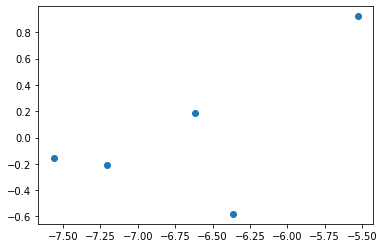

In [244]:
plt.scatter(M[:,0],M[:,1])
plt.show();